In [115]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler

In [116]:
# Step 2: Load the dataset
# Replace 'Telco_customer_churn.csv' with the actual path to your CSV file
df = pd.read_csv('Telco_customer_churn.csv')

In [117]:
# Step 3: Inspect the first few rows to understand the data structure
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Paym

In [118]:
# # Step 4: Drop irrelevant or high-cardinality columns
# #   Columns to drop:
# #     - 'customerID' (unique identifier)
# #     - Geographic columns (e.g., 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude')
# #     - 'Churn Label' (string label) if numeric 'Churn Value' is available
# #     - 'Churn Score' and 'CLTV' (derived or not needed for a base model)
# #     - 'Churn Reason' (too many missing values)
# cols_to_drop = [
#     'CustomerID',
#     'Count',
#     'Country',
#     'State',
#     'City',
#     'Zip Code',
#     'Lat Long',
#     'Latitude',
#     'Longitude',
#     'Churn Label',
#     'Churn Score',
#     'CLTV',
#     'Churn Reason'
# ]
# df.drop(columns=cols_to_drop, inplace=True)

In [119]:
# Step 5: Handle missing values
#   - Convert 'TotalCharges' to numeric (it may be read as a string with spaces)
#   - Drop rows where 'Total Charges' could not be converted
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(subset=['Total Charges'], inplace=True)

In [120]:
# Step 6: Define the target variable and feature set
#   - Use 'Churn Value' as the numeric target (0 = No, 1 = Yes)
y = df['Churn Value']
df.drop(columns=['Churn Value'], inplace=True)  # Remove target from features


In [121]:
#   - Identify numerical vs. categorical columns
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']
categorical_cols = [
    'Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method'
]

X_num = df[numerical_cols].copy()
X_cat = df[categorical_cols].copy()

In [122]:
# Step 7: One-hot encode categorical variables
#   - Use pandas.get_dummies with drop_first=True to avoid multicollinearity
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)

In [123]:
# Step 8: Concatenate numerical and encoded categorical features
X = pd.concat([X_num, X_cat_encoded], axis=1)

In [124]:
# Step 9: Split the data into train (80%), validation (10%), and test (10%) sets
#   - First split: 80% train, 20% temp (which will be split into val/test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [125]:
#   - Second split: Split X_temp (20%) into 10% validation and 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

In [126]:

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 5625 samples
Validation set size: 703 samples
Test set size: 704 samples


In [127]:
# Step 10: Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_val_num = scaler.transform(X_val[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

# Replace the numerical columns in X_train, X_val, X_test with scaled versions
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = X_train_num

X_val_scaled = X_val.copy()
X_val_scaled[numerical_cols] = X_val_num

X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = X_test_num

In [128]:
# Step 11: Instantiate and train the base Logistic Regression model
#   - Increase max_iter to ensure convergence
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [129]:
# Step 12: Evaluate the model on the test set
y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8125


In [130]:
# (Optional) You can also check validation accuracy if desired:
y_pred_val = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.7966


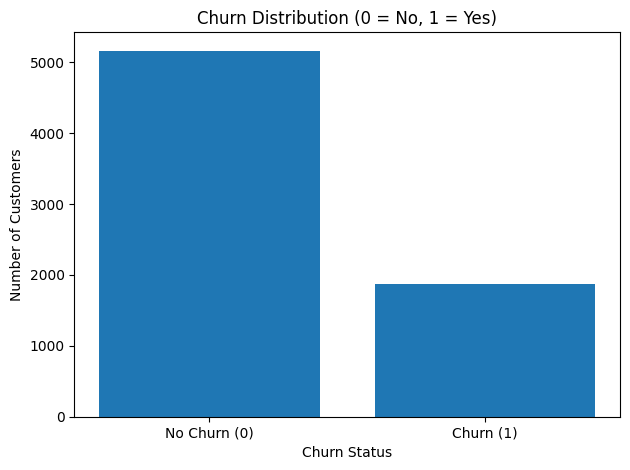

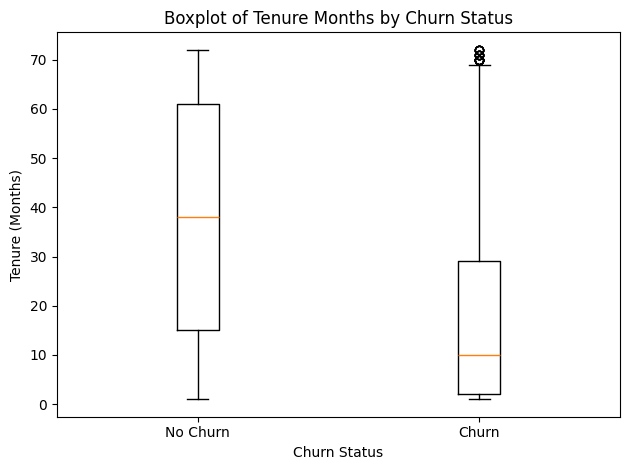

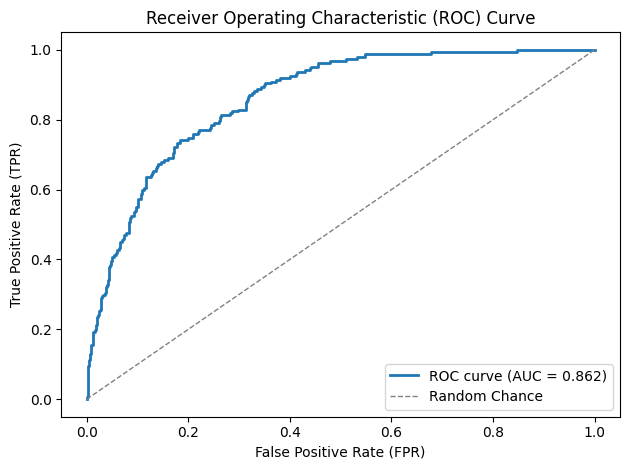

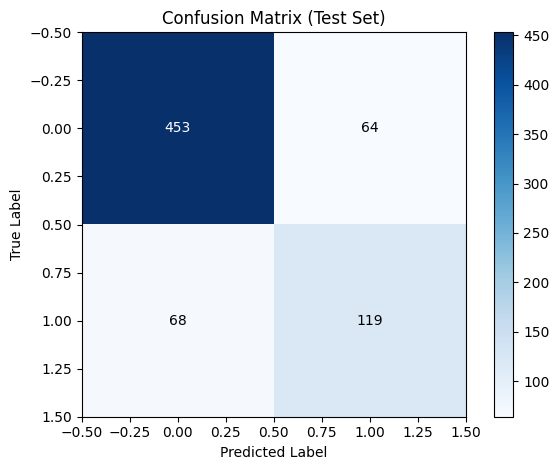

In [131]:
# ===========================
# UPDATED PLOT EXTENSIONS TO AVOID WARNINGS
# Add the following code to your existing notebook after training/evaluating the model.
# ===========================

# Step 13: Import libraries for plotting and additional metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Step 14: Plot 1 – Bar Chart of Churn Distribution
# Plot Type: Bar chart
# What it represents: 
#   - The count of customers who churned versus those who did not churn in the entire dataset.
plt.figure()
churn_counts = y.value_counts().sort_index()  # index 0 = No churn, 1 = Churn
plt.bar(['No Churn (0)', 'Churn (1)'], churn_counts.values)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xlabel('Churn Status')
plt.tight_layout()
plt.show()

# Step 15: Plot 2 – Boxplot of Tenure by Churn Category
# Plot Type: Boxplot
# What it represents:
#   - Distribution of "Tenure Months" for customers who churned vs. those who did not.
plt.figure()
tenure_no_churn = df.loc[y == 0, 'Tenure Months']
tenure_churn    = df.loc[y == 1, 'Tenure Months']
# Use 'tick_labels' instead of the deprecated 'labels'
plt.boxplot([tenure_no_churn, tenure_churn], tick_labels=['No Churn', 'Churn'])
plt.title('Boxplot of Tenure Months by Churn Status')
plt.ylabel('Tenure (Months)')
plt.xlabel('Churn Status')
plt.tight_layout()
plt.show()

# Step 16: Plot 3 – ROC Curve for the Test Set
# Plot Type: ROC curve
# What it represents:
#   - The trade-off between true positive rate (TPR) and false positive rate (FPR).
y_prob_test = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random Chance')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Step 17: Plot 4 – Confusion Matrix on Test Set
# Plot Type: Heatmap-like representation using imshow
# What it represents:
#   - Counts of True Negatives, False Positives, False Negatives, and True Positives.
cm = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots()
cax = ax.imshow(cm, cmap='Blues')
fig.colorbar(cax)
ax.set_title('Confusion Matrix (Test Set)')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
# Annotate cell values
for (i, j), val in np.ndenumerate(cm):
    text_color = 'white' if val > cm.max()/2 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)
plt.tight_layout()
plt.show()
